# Week 2 workshop

Goals:

1. Refreshers of simple arthmetics with Python

2. Examples and exercises: function definitions

3. Examples and exercises: numpy array operations

4. Exercise: lotting data



## Statement of problem / background: Poisson function and probabilities
A Poisson function is given by the expression below:

<div>
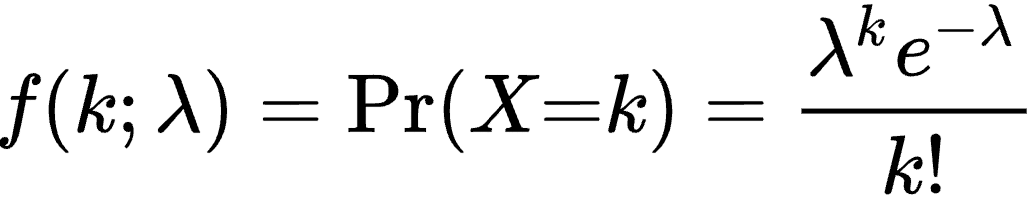
</div>



It has two input arguments: $k$ and $\lambda$. In a "counting" experiment, $k$ represents the number of occurences of certain experimental outcomes, while $\lambda$ represents the expected number of occurrences of the same experimental outcome, the returning value of the Poisson gives the probability of observing $k$ while $\lambda$ is expected. For example, at a hypothetical airport coded ABC, on average, the number of departing flights that are delayed for more than 30 minutes is 10 per day, i.e., $\lambda = 10$. One can ask what is the probability of having exactly 10 flights delayed by over 30 minutes in a single day, given that $\lambda = 10$? What is the probability of having exactly 0 delayed by over 30 minutes in a single day? 

some notes: in the narrative below, I will refer to $k$ as the observation and $\lambda$ as the expectation

In [ ]:
import math


In [ ]:
lambda=10 # why does this not work? Can you fix it?
k=10


In [ ]:
# let's check out a few functions that come with math
# while you can always check out https://docs.python.org/3/library/math.html 
# for functions available in math,
# in practice, it's good to memorize some of the most useful fucntions
x = 1.5
y = math.exp(x)
z = math.factorial(4)
w = math.sqrt(x)

print(y,z,w)

x = math.log(10)
y = math.cos(x)
z = math.log(100,10)
w = math.pi

print(x,y,z,w)



In [ ]:
# develop the code to calculate the two probabilities (k = 10, lambda = 10; and k = 0, lambda = 10) 

continued from the flight delay problelm. Let's keep $\lambda = 10$, what is the probability of having at least 8 flights delayed by over 30 minutes in a single day?

I would figure out the answer to this question in two steps:
1. I would define a Poisson function that takes $k$ and $\lambda$ as the input arguments, and return Poisson($k$, $\lambda$), the Poisson probability
2. since the question is about the probability of having at least 8 delayed flights, one would, in principle, need to do an integral from 8 to infinity, i.e., $\int_{8}^{+inf}$Poisson($k$,$\lambda$) d$k$. I would use the fact that probability is unitary and calculate 1 - $\int_{0}^{7}$Poisson($k$,$\lambda$) d$k$ 

in other words, the problem is basically about writing a few lines of code to do 
1 - $\sum_{k=0}^{7}${Poisson($k$, 10)} (Here I've switched from integral to sum since we deal with a set of discrete input)

We will implement this in two different ways:
### 1) for-loop
In the first approach, we will do an exercise with a for-loop. We will calculate the Poisson probability at each one of the eight values of $k$, and then we sum up the Poisson probabilities. In this exercise, we will also define a function that takes single-valued quantities (expectation and observation) as input arguments and return the Poisson probability. 

### 2) numpy array 
Since the calculation of Poisson proability is needed for all eight possible values of $k$, this is a good use case for numpy array. We will define two numpy arrays: the observation, which should contain eight elements with integer values from 0 to 7; the expectation, which should contain eight element with the same value of 10.  

Once we have the numpy arrays for expectation and observation defined, we will then calculate the Poisson probabilities. 



### Practice: Solution 1
1. Practice function definition
2. Practice for loop

In [ ]:
# define your own Poisson function and do not use any pre-defined Poisson function from a python library
# x, y are the input arguments, expectation, and observation, 
# and this function should return the Poisson probability 
def Poisson_function(x, y):

#### Let's get some exposure to the for-loop structure

In [ ]:
# How do we do the integral from 0 to 7?
# The brute force approach would
# plug the numbers into the Poisson function defined above and calculate all seven terms and sum them up

# here let's try to use a for loop 
for i in range(8):
    print(i)
    
# an integral/sum int_{0}^{7} i could be done by

# the few lines below allow you to run a for loop
# in each iteration, the value of variable integral increases by i
# which is the index of the loop
integral = 0 
for i in range(8):
    integral += i

print(integral)



In [ ]:
# delevelop the code in this cell, to get the answer to the question 
# what is the probability of having at least 8 flights delayed by over 30 minutes in a single day?

### Practice: Solution 2 with Numpy arrays
Let's try to solve the same problem with numpy array. In order to use numpy array, you would need to import numpy first

#### This exercise uses a numpy array to achieve the same goal 

In [ ]:
import numpy as np
# and gives it an alias np

In [ ]:
# let's create the observation array
# here we use the linspace function of numpy
k_s = np.linspace(0,7,8)

In [ ]:
# a numpy array has shape, dimension, and size
# let's print out these properties for k_s
print(k_s.size)
print(k_s.ndim)
print(k_s.shape)
print(k_s)

In [ ]:
# it is useful to know these properties for a given numpy array
# write a function that takes a numpy array as input argument
# and prints out these three properties as well as the array itself

def np_analyzer( a ):
    # complete this cell
    print(a.size)
    print(a.ndim)
    print(a.shape)
    print(a)

np_analyzer(k_s)

In [ ]:
# now let's create the expectation array 

lambda_s = np.ones((8,))
np_analyzer(lambda_s)

# How did I create lambda_s? What information did I use as the input argument?

lambda_s = 10*lambda_s

np_analyzer(lambda_s)

In [ ]:
#now let's what would happen if we put the numpy array of k_s and lambda_s as inputs to 
# the poisson function you just defined
Poisson_function(k_s, lambda_s)
# what has happened after you execute this cell?

In [ ]:
# now let's vectorize it, 
# so that it could take numpy arrays as input
vec_poisson = np.vectorize(poisson_function)

In [ ]:
# this would print out poisson probability values for all eight pairs of (k and lambda) 
prob_s = vec_poisson(k_s, lambda_s)
np_analyzer(prob_s)
# write the code to get the answer to the question

### in the second part of solution 2, let's define a function that takes numpy arrays as the input"


In [ ]:
# before we define that function, 
# let's run a few exercises that would expose you to some basic elements needed

# check out the output and try to understand what these different operations do
a = np.ones((2,3))
np_analyzer(a)

b = np.eye(2,3)
np_analyzer(b)

c = 2*a + b
np_analyzer(c)

d = c**2
np_analyzer(d)


In [ ]:
# we just saw from d = c**2,
# each element in the output array d, is the squared value of its corresponding element in array c
# now let's see what e = c**b would do
e = c**b
print(e)


In [ ]:
# from the above you can tell that the operation is done element wise
# how about exponential?
# let's try f = np.exp(-1*d)


In [ ]:
# how about factorial?
# here let's try the following

import scipy.special

g = scipy.special.factorial(d)
print(g)

In [ ]:
# now let's define the Poisson function
def Poisson_function_with_arrays(exp, obs ):

# this function should return a numpy array
# the Poisson probability calculation is done element-wise

In [ ]:
# write the code that uses Poisson_function_with_arrays(exp, obs ) to get the answer

## The last part of this workshop is to give you some exposure to data visualization 
### Practice

Let's do some visualization of Poisson distribution. Assume the expectation is $\lambda = 10$, then let's draw the probability of observing outcome $k$ as a function of $k$. 


In [ ]:
# we will recycle what we did just now. 
# Let's create an observation array from 0 to 20
obs = np.linspace(0,20,21)

# and a 1-D expectation array of shape (21,) with all elements = 10
exp = np.ones((21,))*10

# and let's calculate the probability
prob = Poisson_function_with_arrays(exp,obs)

print(prob)

# incidentally, now that the probability array for observations spanning from 0 to 20
# you could also try to get the sum of probabilities (sum_0^7{Poisson(k,10)} ) with  np.sum(prob[:8])

# how about np.sum(prob[8:]), can you compare np.sum(prob[8:]) and 1 - np.sum(prob[:8])?



In [ ]:
# let's make some plots
import matplotlib.pyplot as plt

plt.scatter(obs,prob)

# now add titles to the x and y axes
# x title should be "outcome"
# y title should be "probability"
# hint: you should be able to do this if you attended the last workshop

In [ ]:
#let's make the same distribution but as a histogram
# before doing that, let's one example

# x values 
x = np.linspace(5.5,35.5,31)
print(x)

# create a weight array, which is dummy in this example
np.random.seed(1)
weights = np.random.normal(100, 5, 31)

print(weights)

# now draw your histogram
plt.hist(x, bins=30, range = (5,35), weights = weights)


# recap: I created a weighted histogram. There are only 31 entries, i.e., the 31 elements of array x
# I used weights option of the plt.hist() function to set proper values for Y axis
# I used bins, and range options to make sure the histogram has a horiztonal range between 5 and 35
# and 30 uniform bins

In [ ]:
# now let's come back to draw the histogram for the Poisson distribution of Poisson(k,10)